## Plot graphs for the report - Default problem

In [210]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-muted')
plt.style.use('seaborn-v0_8-ticks')
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red"]
plt.rcParams.update({'font.size': 13})
import matplotlib.cm as cm
import pandas as pd
import os

sts = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]  # 16
ratios = [[1000,1],[100,1],[10,1],[1,1],[1,10],[1,100],[1,1000],[1,1000],[1,10000],[1,100000],[1,1000000],[1,10000000]]    #7
sizes = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]  #10

### Vary matrix size

In [211]:
# Import all individual data points
path = "data/run_analysis/"
files = os.listdir(path)
out = []

st = 16
n_max = 50
weights = [1,1]

for n_max in sizes:
    file = f"result_CRAM_IC_{st}_{n_max}_{weights[0]}_{weights[1]}.npy"
    out.append(np.load(path+file, allow_pickle=True))       
out = np.array(out)
out_ = out.T

# Preprocessing
weights_0, weights_1, ratio, st, stiffness, n_max, pinn_time, time_cram, epochs, total_error, final_error, relative_error, relative_final_error = out_[:13]
loss_history, IC_loss_history, ODE_loss_history = out_[13:13+51], out_[13+51:13+2*51], out_[13+2*51:]
IC_loss = np.array([np.trim_zeros(IC_loss_history[:,i], "b")[-1] for i in range(len(epochs))])
ODE_loss = np.array([np.trim_zeros(ODE_loss_history[:,i], "b")[-1] for i in range(len(epochs))])
loss = np.array([np.trim_zeros(loss_history[:,i], "b")[-1] for i in range(len(epochs))])

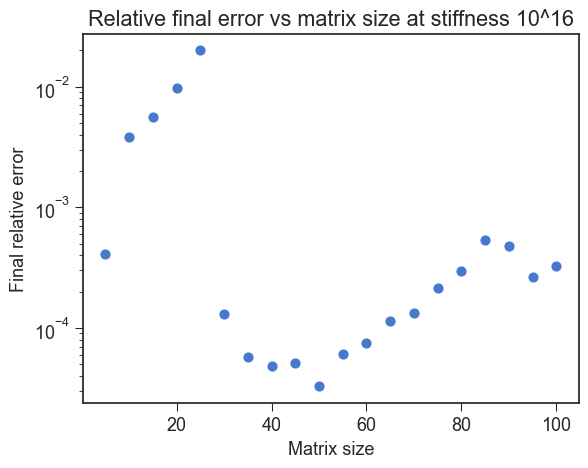

In [212]:
plt.scatter(n_max, relative_final_error, s=40)
# plt.xscale("log")
plt.yscale("log")
plt.ylabel("Final relative error")
plt.xlabel("Matrix size")
plt.title("Relative final error vs matrix size at stiffness 10^16")
plt.savefig("results/final/error_vs_size.png", bbox_inches='tight')

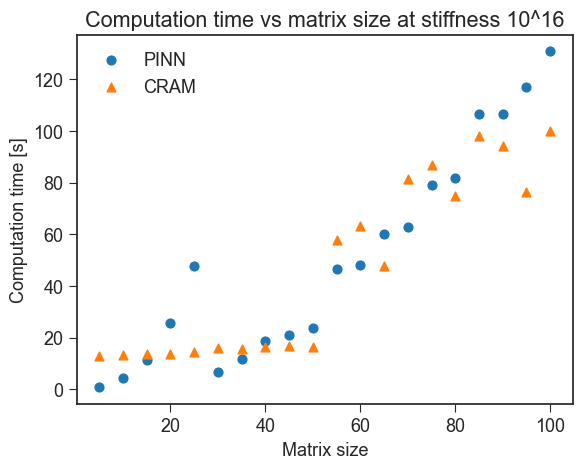

In [213]:
plt.scatter(n_max, pinn_time, s=40, c=colors[0], label="PINN")
plt.scatter(n_max, time_cram, marker="^", c=colors[1], label="CRAM", s=40)
# plt.plot(sizes, pinn_time, c=colors[0], label="PINN mean")
# plt.plot(sizes, time_cram, c=colors[1], label="CRAM mean")
# plt.xscale("log")
plt.ylabel("Computation time [s]")
plt.xlabel("Matrix size")
plt.title("Computation time vs matrix size at stiffness 10^16")
plt.legend()
plt.savefig("results/final/time_vs_size.png", bbox_inches='tight')

### Vary stiffness

In [214]:
# Import all individual data points
path = "data/run_analysis/"
files = os.listdir(path)
out = []

st = 16
n_max = 50
weights = [1,1]

for st in sts:
    file = f"result_CRAM_IC_{st}_{n_max}_{weights[0]}_{weights[1]}.npy"
    out.append(np.load(path+file, allow_pickle=True))       
out = np.array(out)
out_ = out.T

# Preprocessing
weights_0, weights_1, ratio, st, stiffness, n_max, pinn_time, time_cram, epochs, total_error, final_error, relative_error, relative_final_error = out_[:13]
loss_history, IC_loss_history, ODE_loss_history = out_[13:13+51], out_[13+51:13+2*51], out_[13+2*51:]
IC_loss = np.array([np.trim_zeros(IC_loss_history[:,i], "b")[-1] for i in range(len(epochs))])
ODE_loss = np.array([np.trim_zeros(ODE_loss_history[:,i], "b")[-1] for i in range(len(epochs))])
loss = np.array([np.trim_zeros(loss_history[:,i], "b")[-1] for i in range(len(epochs))])

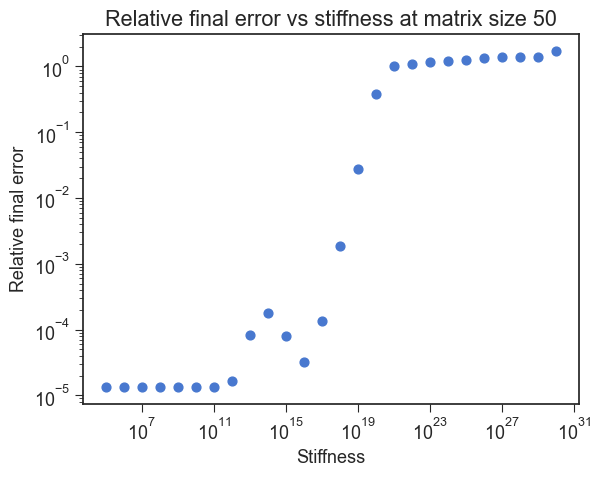

In [215]:
plt.scatter(stiffness, relative_final_error, s=40)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Stiffness")
plt.ylabel("Relative final error")
plt.title("Relative final error vs stiffness at matrix size 50")
plt.savefig("results/final/error_vs_stiffness.png", bbox_inches='tight')

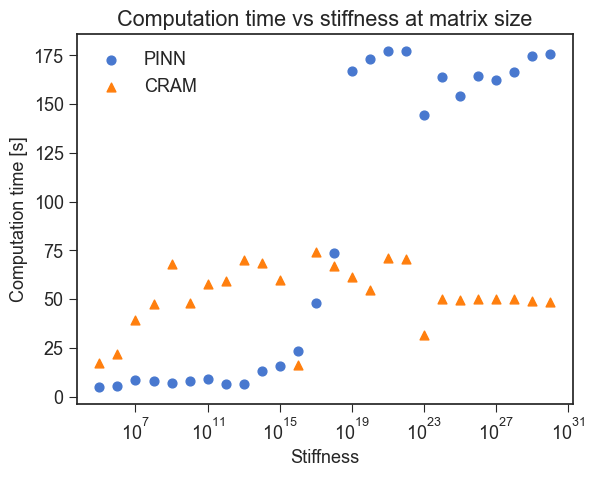

In [216]:
plt.scatter(stiffness, pinn_time, label = "PINN", s=40)
plt.scatter(stiffness, time_cram, marker="^", s=40, c=colors[1],label = "CRAM")
plt.xscale("log")
# plt.yscale("log")
plt.ylabel("Computation time [s]")
plt.xlabel("Stiffness")
plt.title("Computation time vs stiffness at matrix size")
plt.legend()
plt.savefig("results/final/time_vs_stiffness.png", bbox_inches='tight')

### Vary the ratio

In [217]:
# Import all individual data points
path = "data/run_analysis/"
files = os.listdir(path)
out = []

st = 16
n_max = 50
weights = [1,1]

for weights in ratios:
    file = f"result_CRAM_IC_{st}_{n_max}_{weights[0]}_{weights[1]}.npy"
    out.append(np.load(path+file, allow_pickle=True))       
out = np.array(out)
out_ = out.T

# Preprocessing
weights_0, weights_1, ratio, st, stiffness, n_max, pinn_time, time_cram, epochs, total_error, final_error, relative_error, relative_final_error = out_[:13]
loss_history, IC_loss_history, ODE_loss_history = out_[13:13+51], out_[13+51:13+2*51], out_[13+2*51:]
IC_loss = np.array([np.trim_zeros(IC_loss_history[:,i], "b")[-1] for i in range(len(epochs))])
ODE_loss = np.array([np.trim_zeros(ODE_loss_history[:,i], "b")[-1] for i in range(len(epochs))])
loss = np.array([np.trim_zeros(loss_history[:,i], "b")[-1] for i in range(len(epochs))])

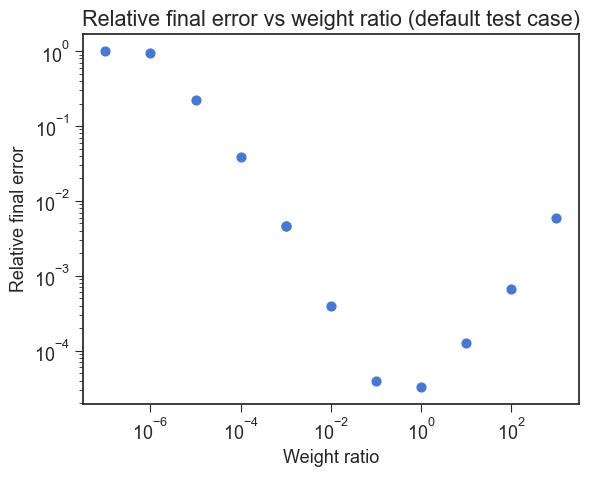

In [218]:
plt.scatter(ratio, relative_final_error, s=40)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Weight ratio")
plt.ylabel("Relative final error")
plt.title("Relative final error vs weight ratio (default test case)")
plt.savefig("results/final/error_vs_ratio.png", bbox_inches='tight')

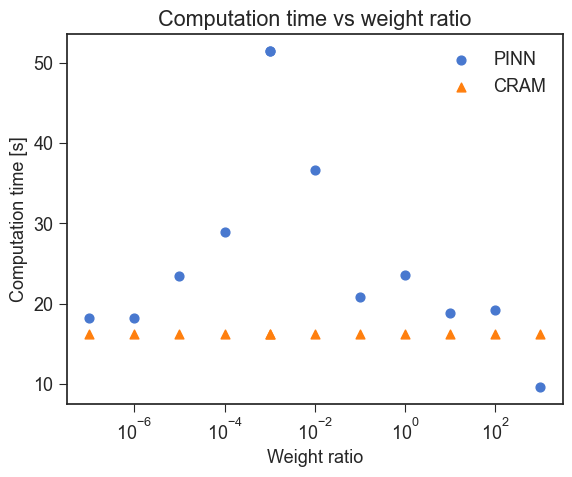

In [219]:
plt.scatter(ratio, pinn_time, s=40, label = "PINN")
plt.scatter(ratio, time_cram, marker="^", s=40, c=colors[1],label = "CRAM")
plt.xscale("log")
# plt.yscale("log")
plt.ylabel("Computation time [s]")
plt.xlabel("Weight ratio")
plt.title("Computation time vs weight ratio")
plt.legend()
# Kinda useless

# OLD code

Text(0.5, 1.0, 'Final error vs matrix size')

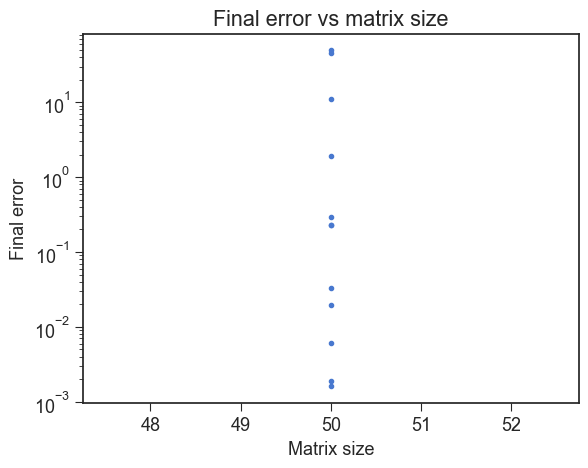

In [220]:
# Final error, computation time vs size @ given stiffness
# for s in sts:
#     mask = st == s
#     plt.plot(n_max[mask], final_error[mask], ".", label=f"Stiffness 10^{s}")

plt.plot(n_max, final_error, ".")
# plt.xscale("log")
plt.yscale("log")
plt.ylabel("Final error")
plt.xlabel("Matrix size")
plt.title("Final error vs matrix size")
# plt.legend()

/var/folders/vd/1s5tjyzd0b53qpf4dc5m7ttm0000gn/T/ipykernel_72897/519065581.py:9: RuntimeWarning: Mean of empty slice.
  p_time.append(pinn_time[mask].mean())
/Users/mihapompe/miniforge3/envs/PINN/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/vd/1s5tjyzd0b53qpf4dc5m7ttm0000gn/T/ipykernel_72897/519065581.py:10: RuntimeWarning: Mean of empty slice.
  c_time.append(time_cram[mask].mean())


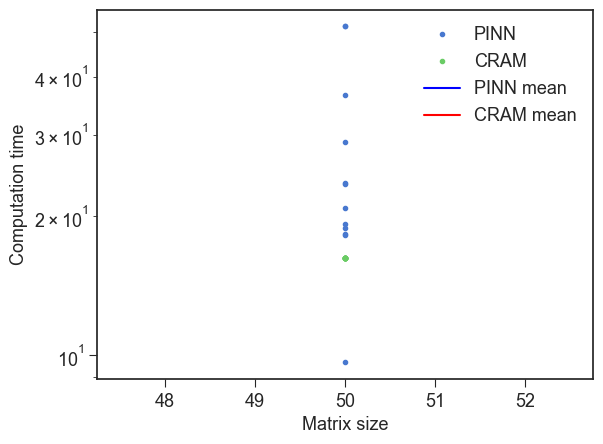

In [221]:

# plt.style.use('fast')

# plt.style.use('tableau-colorblind10')
plt.plot(n_max, pinn_time, ".", label="PINN")
plt.plot(n_max, time_cram, ".", label="CRAM")
p_time, c_time = [], []
for n in sizes:
    mask = n_max == n
    p_time.append(pinn_time[mask].mean())
    c_time.append(time_cram[mask].mean())
plt.plot(sizes, p_time, "b", label="PINN mean")
plt.plot(sizes, c_time, "r", label="CRAM mean")
# plt.xscale("log")
plt.yscale("log")
plt.ylabel("Computation time")
plt.xlabel("Matrix size")
plt.legend()
# star for best model (smallest final error for each matrix size)
# can plot each line for each stiffness
# error bar isntead of points?
# include this plot

/var/folders/vd/1s5tjyzd0b53qpf4dc5m7ttm0000gn/T/ipykernel_72897/2010131159.py:15: RuntimeWarning: Mean of empty slice.
  ic_e.append(ic_epoch[mask].mean())
/var/folders/vd/1s5tjyzd0b53qpf4dc5m7ttm0000gn/T/ipykernel_72897/2010131159.py:16: RuntimeWarning: Mean of empty slice.
  ode_e.append(ode_epoch[mask].mean())
/var/folders/vd/1s5tjyzd0b53qpf4dc5m7ttm0000gn/T/ipykernel_72897/2010131159.py:17: RuntimeWarning: Mean of empty slice.
  loss_e.append(loss_epoch[mask].mean())


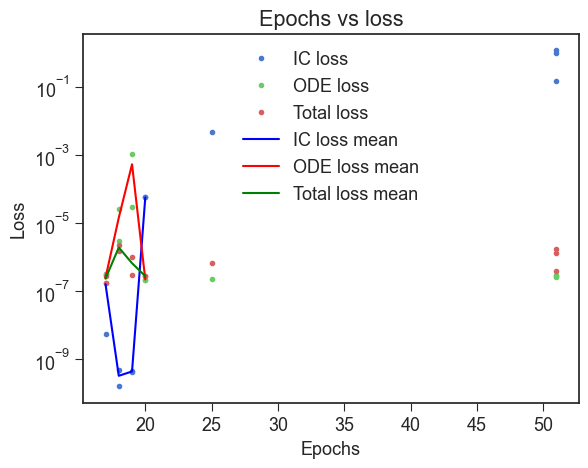

In [222]:
# IC loss and ODE loss vs epoch @ different weight ratios
ic_epoch = np.array([np.trim_zeros(IC_loss_history[:,i], "b")[-1] for i in range(len(epochs))])
ode_epoch = np.array([np.trim_zeros(ODE_loss_history[:,i], "b")[-1] for i in range(len(epochs))])
loss_epoch = np.array([np.trim_zeros(loss_history[:,i], "b")[-1] for i in range(len(epochs))])

plt.plot(epochs, ic_epoch, ".", label = "IC loss")
plt.plot(epochs, ode_epoch, ".", label = "ODE loss")
plt.plot(epochs, loss_epoch, ".", label = "Total loss")

ic_e, ode_e, loss_e = [], [], []
for e in range(int(epochs.min()), int(epochs.max())+1):
    mask = epochs == e
    # print(ic_epoch[mask].mean())

    ic_e.append(ic_epoch[mask].mean())
    ode_e.append(ode_epoch[mask].mean())
    loss_e.append(loss_epoch[mask].mean())
eps = [i for i in range(int(epochs.min()), int(epochs.max())+1)]
plt.plot(eps, ic_e, "b", label="IC loss mean")
plt.plot(eps, ode_e, "r", label="ODE loss mean")
plt.plot(eps, loss_e, "g", label="Total loss mean")

# plt.xscale("log")
plt.yscale("log")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.title("Epochs vs loss")
plt.legend()


Text(0.5, 0.92, 'Final error vs weight ratio and stiffness')

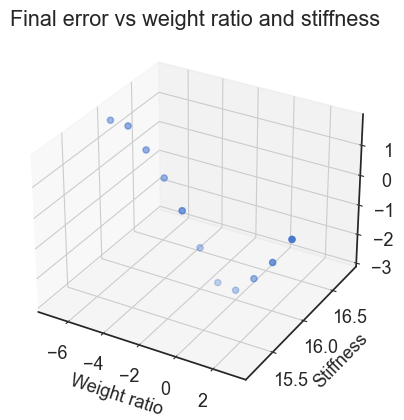

In [223]:
# Weight ratio vs stiffness color is final loss/final error @ particular weight ratio

# Create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
log_ratio = [np.log10(r) for r in ratio]
log_final_error = [np.log10(e) for e in final_error]
ax.scatter(log_ratio, st, log_final_error)

# Set labels and title
ax.set_xlabel('Weight ratio')
ax.set_ylabel('Stiffness')
ax.set_zlabel('Final error')
ax.set_title('Final error vs weight ratio and stiffness')


In [224]:
def convert_to(x,y,z):
    x_ = np.unique(x)
    y_ = np.unique(y)
    X, Y = np.meshgrid(x_, y_)
    Z = np.zeros_like(X)
    print(Z.shape, x_.shape, y_.shape)
    z = np.array(z)
    for m, i in enumerate(x_):
        for n, j in enumerate(y_):
            mask = (x == i)*(y == j)
            Z[n,m] = z[mask].mean()
    return X, Y, Z

(1, 11) (11,) (1,)
3.0 16.0 1.6916619805215536


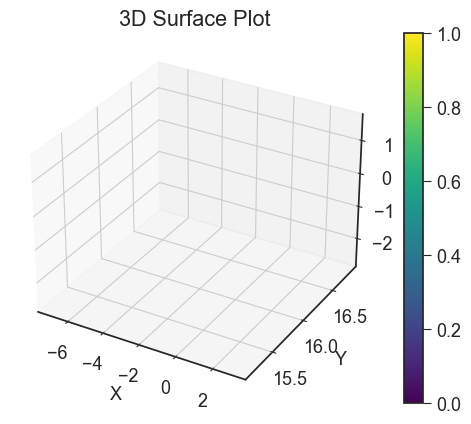

In [225]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid from x and y values
X, Y, Z = convert_to(log_ratio, st, log_final_error)
print(X.max(), Y.max(),Z.max())


# Plot the surface
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')

# Add a colorbar
fig.colorbar(surf)

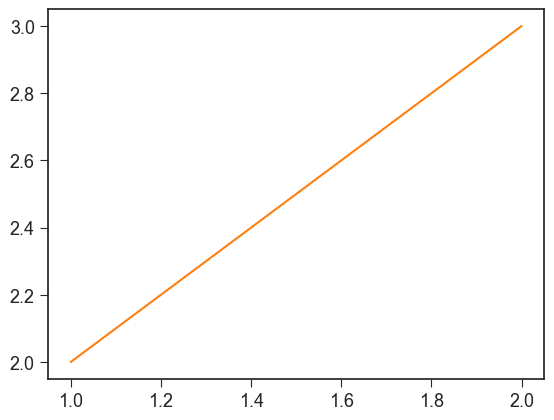

In [226]:
A = [1,2]
B = [2,3]
plt.plot(A, B, c="tab:orange")

In [227]:
def get_indices_of_three_largest_elements(array):
    indices = []
    # Get the indices of the three largest elements
    for i in range(3):
        max_index = max(range(len(array)), key=array.__getitem__)
        indices.append(max_index)
        array[max_index] = float('-inf')  # Set the maximum value to negative infinity
    return indices

# Example usage
my_array = [10, 5, 8, 20, 13, 7]
largest_indices = get_indices_of_three_largest_elements(my_array)
print(largest_indices)

[3, 4, 0]
